In [19]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import random as rand           # random number generation
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
df = pd.read_excel(file)


# outputting the first ten rows of the dataset
df.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [20]:
# using .shape to view (ROWS, COLUMNS)
df.shape
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {df.shape[0]}
Features:     {df.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [21]:
#Viewing dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [22]:
# descriptive statistics for numeric data
df.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [23]:
#checking no missing value left
df.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [24]:
# instantiating imputation values
fill= 0.001
# imputing missing values
df['meduc'] = df['meduc'].fillna(fill)
df['npvis'] = df['npvis'].fillna(fill)
df['feduc'] = df['feduc'].fillna(fill)

In [25]:
#checking missing values
df.isnull().sum()

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

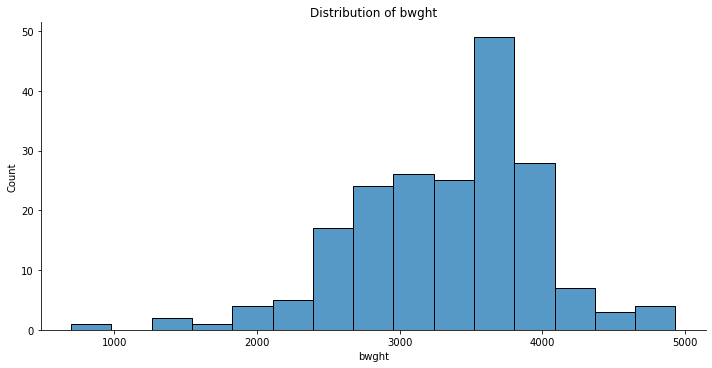

In [26]:
# displaying the plot for 'bwght'
sns.displot(x = 'bwght',
            data = df,
            height = 5,
            aspect = 2)


# title and labels
plt.title('Distribution of bwght')

# displaying the plot
plt.show()

In [27]:
# log transformation and saving as new column
df['log_bwght'] = np.log10(df['bwght'])
df['log_mage'] = np.log10(df['mage'])
df['log_fage'] = np.log10(df['fage'])
df['log_npvis'] = np.log10(df['npvis'])
df['log_meduc'] = np.log10(df['meduc'])
df['log_feduc'] = np.log10(df['feduc'])
df['log_monpre'] = np.log10(df['monpre'])

In [52]:
# preparing explanatory variable data
df1 = df.drop(['bwght', 'log_bwght','omaps', 'fmaps','male'           
,'mwhte'          
,'mblck'          
,'moth'           
,'fwhte'          
,'fblck'          
,'foth',
'mage',
'meduc',     
'monpre',    
'npvis',     
'fage' ,    
'feduc'],axis = 1)

# preparing response variable data
df_target = df.loc[ : , 'bwght']
log_df_target = df.loc[ : , 'log_bwght'] # ready for use later

In [53]:
# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            df1,
            df_target,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 8)
y-side: 147


Testing Data
------------
X-side: (49, 8)
y-side: 49



In [54]:
# declaring set of x-variables
x_variables = ['log_mage','log_meduc',     
'log_monpre',    
'log_npvis',     
'log_fage' ,    
'log_feduc' ,   
'cigs' ,   
'drink'
]


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_mage +
log_meduc +
log_monpre +
log_npvis +
log_fage +
log_feduc +
cigs +
drink +


In [55]:
# merging X_train and y_train so that they can be used in statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

# build a model
df_best = smf.ols(formula =  """bwght ~ log_mage +log_meduc +log_monpre +log_npvis +log_fage +log_feduc +cigs +drink""",
                                data = df_train)

# fit the model based on the data
results = df_best.fit()

# analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     42.24
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.73e-33
Time:                        21:41:19   Log-Likelihood:                -1073.7
No. Observations:                 147   AIC:                             2165.
Df Residuals:                     138   BIC:                             2192.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7175.6283    590.906     12.143      0.0

In [56]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = df1.loc[ : , x_variables]


# Preparing the target variable
df_target = df.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df1,     # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            df_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [57]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.71
OLS Testing Score  : 0.6633
OLS Train-Test Gap : 0.0467


In [58]:
# zipping each feature name to its coefficient
lr_model_values = zip(df1[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    


In [59]:
import sklearn.linear_model # linear models

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha= 5,  
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6855
Lasso Testing Score  : 0.6749
Lasso Train-Test Gap : 0.0106


In [60]:
# zipping each feature name to its coefficient
lasso_model_values = zip(df1.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

In [61]:
# preparing training and testing sets
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            df1,
            log_df_target,
            test_size = 0.25,
            random_state = 219)

In [62]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.57
Testing Score : 0.5572
ARD Train-Test Gap : 0.0128


In [63]:
# zipping each feature name to its coefficient
ard_model_values = zip(df1.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

In [64]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(df1)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(df1)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7
count,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.80,-1.80,-2.16,-2.37,-7.67,-7.96,-5.12,-1.43
25%,-0.81,-0.47,-0.68,-0.46,-0.04,0.01,0.13,-0.05
50%,0.01,-0.13,0.00,-0.04,0.20,0.14,0.21,-0.05
75%,0.71,0.62,0.68,0.53,0.20,0.25,0.29,0.76
max,2.31,2.87,2.46,2.98,1.09,0.30,0.32,2.71


In [65]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = df1.columns


In [66]:
# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            df1,
            df_target,
            test_size = 0.25,
            random_state = 219)

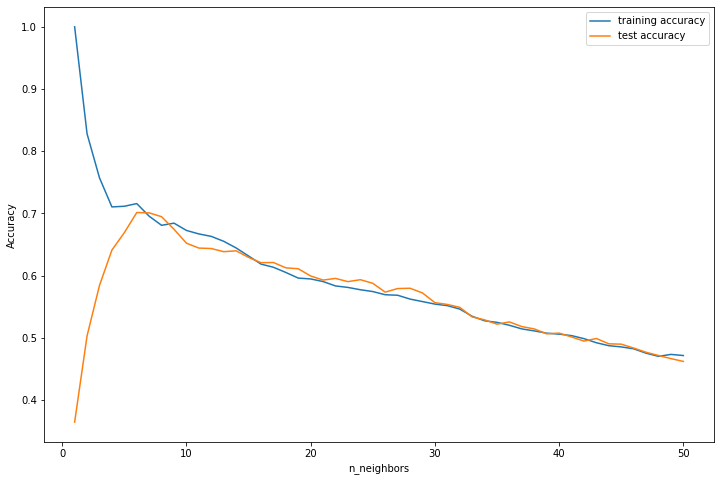

In [67]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [68]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 6


In [69]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)


# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)


# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.7158
KNN Testing Score : 0.7015
KNN Train-Test Gap: 0.0143


In [70]:
# comparing results
print(f"""
Model              Train Score      Test Score     Train-Test Gap
-----               -----------      ----------     ----------
OLS                  {lr_train_score}            {lr_test_score}          {lr_test_gap}
Lasso                {lasso_train_score}          {lasso_test_score}          {lasso_test_gap}
ARD                  {ard_train_score}            {ard_test_score}          {ard_test_gap}
KNN(Choosen Model)   {knn_opt_score_train}          {knn_opt_score_test}          {knn_opt_test_gap}
""")



Model              Train Score      Test Score     Train-Test Gap
-----               -----------      ----------     ----------
OLS                  0.71            0.6633          0.0467
Lasso                0.6855          0.6749          0.0106
ARD                  0.57            0.5572          0.0128
KNN(Choosen Model)   0.7158          0.7015          0.0143

